Parte 1

Librerias y lectura de archivo CSV

In [16]:
# Librería principal para manipulación de datos
import pandas as pd

# Librería para cálculos numéricos
import numpy as np

# Librería para gráficos básicos
import matplotlib.pyplot as plt

# Librería para gráficos estadísticos más avanzados
import seaborn as sns

# Configuración visual de seaborn
sns.set(style="whitegrid")

# Tamaño por defecto de las figuras
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv(
    "C:/Users/analu/Downloads/Curso_python/VentasOnline/data/ventas_online.csv"
)




In [8]:
# Mostrar las primeras 5 filas del dataset
# Sirve para entender la estructura general de los datos
df.head()


,order_id,fecha,cliente_id,categoria,producto,precio,cantidad,region,metodo_pago,satisfaccion
0,1001,2024-04-12,C002,Electrónica,Libro,86,3,Centro,Efectivo,5
1,1002,2024-12-14,C128,Ropa,Libro,168,5,Centro,Tarjeta,4
2,1003,2024-09-27,C160,Electrónica,Libro,107,2,Norte,Transferencia,5
3,1004,2024-04-16,C084,Hogar,Camiseta,111,4,Oeste,Transferencia,2
4,1005,2024-03-12,C152,Ropa,Zapatillas,141,5,Centro,Tarjeta,2


In [9]:
# Mostrar las últimas 5 filas
# Útil para ver cómo termina el dataset
df.tail()


,order_id,fecha,cliente_id,categoria,producto,precio,cantidad,region,metodo_pago,satisfaccion
495,1496,2024-11-20,C152,Electrónica,Auriculares,130,5,Norte,Transferencia,2
496,1497,2024-01-04,C006,Deportes,Auriculares,29,1,Este,Transferencia,3
497,1498,2024-01-16,C066,Deportes,Libro,84,1,Sur,Efectivo,3
498,1499,2024-10-06,C075,Ropa,Auriculares,252,1,Este,Transferencia,5
499,1500,2024-12-01,C004,Hogar,Libro,232,5,Sur,Transferencia,5


In [10]:
# Muestra información de columnas, tipos de datos y valores nulos
# Fundamental para entender cómo están almacenados los datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      500 non-null    int64 
 1   fecha         500 non-null    object
 2   cliente_id    500 non-null    object
 3   categoria     500 non-null    object
 4   producto      500 non-null    object
 5   precio        500 non-null    int64 
 6   cantidad      500 non-null    int64 
 7   region        500 non-null    object
 8   metodo_pago   500 non-null    object
 9   satisfaccion  500 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 39.2+ KB


In [11]:
# Devuelve una tupla con (filas, columnas)
# Permite saber el tamaño del dataset
df.shape


(500, 10)

In [12]:
# Estadísticas descriptivas de columnas numéricas
# Media, mínimo, máximo, cuartiles, etc.
df.describe()


,order_id,precio,cantidad,satisfaccion
count,500.000000,500.00000,500.000000,500.000000
mean,1250.500000,156.29400,3.030000,2.980000
std,144.481833,83.53303,1.418847,1.416903
min,1001.000000,11.00000,1.000000,1.000000
25%,1125.750000,88.00000,2.000000,2.000000
50%,1250.500000,153.00000,3.000000,3.000000
75%,1375.250000,232.00000,4.000000,4.000000
max,1500.000000,299.00000,5.000000,5.000000


In [13]:
# Cuenta cuántos valores nulos hay por columna
# Importante para decidir cómo limpiar los datos
df.isnull().sum()


order_id        0
fecha           0
cliente_id      0
categoria       0
producto        0
precio          0
cantidad        0
region          0
metodo_pago     0
satisfaccion    0
dtype: int64

In [14]:
# Cuenta filas duplicadas
# Ayuda a evitar resultados incorrectos en el análisis
df.duplicated().sum()


np.int64(0)

In [15]:
# Convertir la columna 'fecha' a formato datetime
# Necesario para análisis temporal (meses, años, tendencias)
df["fecha"] = pd.to_datetime(df["fecha"])


PARTE 2: Limpieza de datos

In [17]:
# Elimina filas duplicadas y conserva la primera aparición
df = df.drop_duplicates()


In [18]:
# Elimina filas donde precio o cantidad tengan valores nulos
# No tendría sentido calcular ventas sin estos datos
df = df.dropna(subset=["precio", "cantidad"])


In [19]:
# Reemplaza valores nulos de satisfacción por el promedio
# Evita perder datos y mantiene una distribución razonable
df["satisfaccion"] = df["satisfaccion"].fillna(df["satisfaccion"].mean())


In [20]:
# Calcula el total de la venta por pedido
# Métrica clave para todo el análisis
df["total_venta"] = df["precio"] * df["cantidad"]


Parte 3 Análisis Exploratorio de Datos (EDA)

Análisis general

In [21]:
# Suma todas las ventas del año
# Permite medir el desempeño general del negocio
ventas_totales = df["total_venta"].sum()
ventas_totales


np.int64(235814)

In [23]:
# Calcula el valor promedio de cada pedido
# Útil para conocer el ticket promedio general
venta_promedio = df["total_venta"].mean()
venta_promedio


np.float64(471.628)

In [22]:
# Cuenta cuántos clientes diferentes realizaron compras
# Indica alcance y base de clientes
clientes_unicos = df["cliente_id"].nunique()
clientes_unicos


186

Análisis por categoría

In [24]:
# Agrupa por categoría y suma el total de ventas
# Permite comparar rendimiento entre categorías
ventas_categoria = (
    df.groupby("categoria")["total_venta"]
    .sum()
    .sort_values(ascending=False)
)

ventas_categoria


categoria
Electrónica    52645
Ropa           52326
Libros         44501
Hogar          43260
Deportes       43082
Name: total_venta, dtype: int64

In [25]:
# Devuelve la categoría con mayor venta total
ventas_categoria.idxmax()


'Electrónica'

In [26]:
# Calcula el promedio de unidades vendidas por categoría
df.groupby("categoria")["cantidad"].mean()


categoria
Deportes       3.093023
Electrónica    3.082569
Hogar          2.920792
Libros         2.900990
Ropa           3.155340
Name: cantidad, dtype: float64

Análisis por región

In [27]:
# Agrupa por región y suma el total de ventas
ventas_region = (
    df.groupby("region")["total_venta"]
    .sum()
    .sort_values(ascending=False)
)

ventas_region


region
Este      49329
Centro    48735
Oeste     48047
Sur       44885
Norte     44818
Name: total_venta, dtype: int64

In [28]:
# Devuelve la región con mayor ingreso
ventas_region.idxmax()


'Este'

In [29]:
# Calcula el promedio de ventas por pedido en cada región
df.groupby("region")["total_venta"].mean()


region
Centro    464.142857
Este      493.290000
Norte     457.326531
Oeste     444.879630
Sur       504.325843
Name: total_venta, dtype: float64

PARTE 4: Visualización de datos

Ventas por categoría

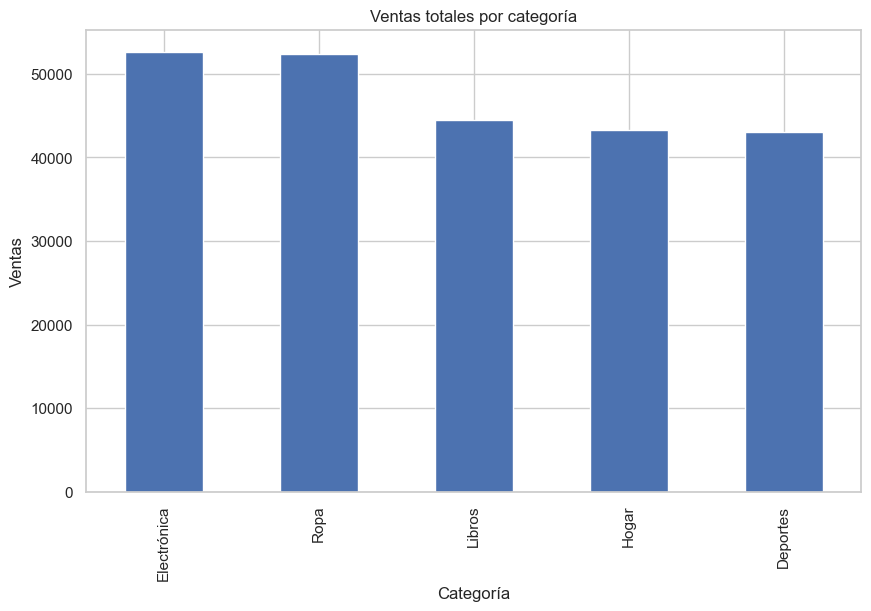

In [30]:
# Gráfico de barras de ventas totales por categoría
ventas_categoria.plot(kind="bar")

# Título y etiquetas para mejor interpretación
plt.title("Ventas totales por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")

plt.show()


Ventas por región

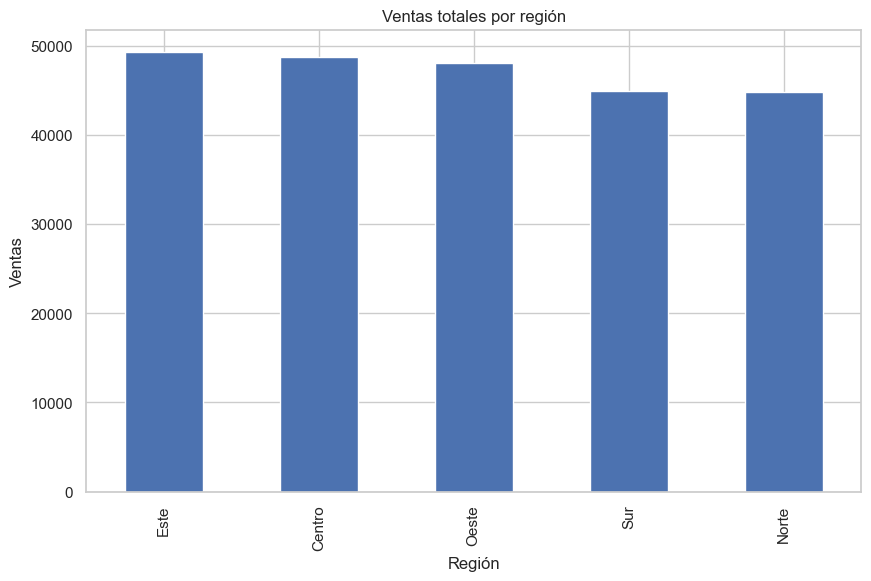

In [31]:
# Gráfico de barras de ventas totales por región
ventas_region.plot(kind="bar")

plt.title("Ventas totales por región")
plt.xlabel("Región")
plt.ylabel("Ventas")

plt.show()


Ventas mensuales

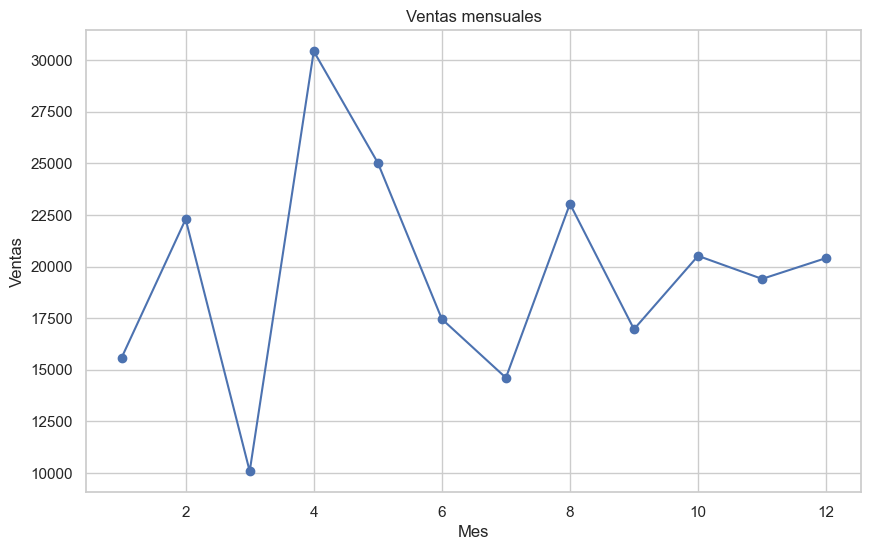

In [33]:
df["fecha"] = pd.to_datetime(df["fecha"])
# Extrae el mes de la fecha
df["mes"] = df["fecha"].dt.month

# Agrupa ventas por mes
ventas_mes = df.groupby("mes")["total_venta"].sum()

# Gráfico de línea para ver tendencias
ventas_mes.plot(marker="o")

plt.title("Ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas")

plt.show()


Distribución del total de venta

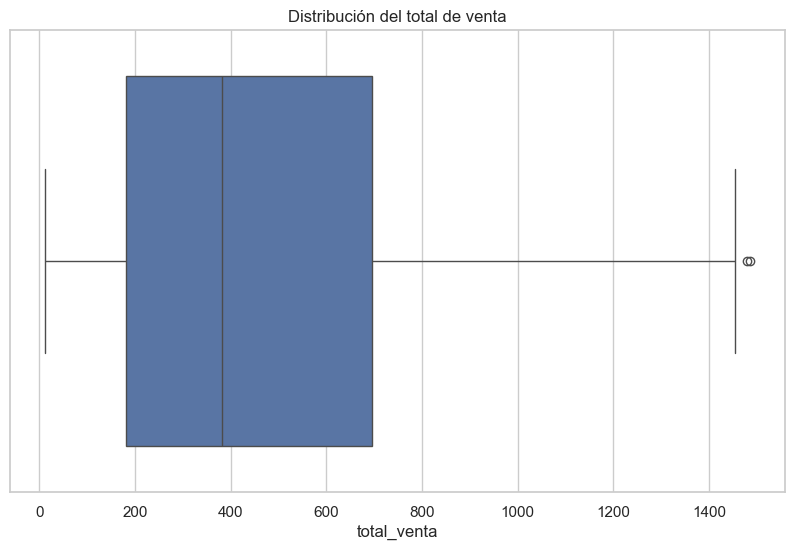

In [34]:
# Boxplot para detectar valores atípicos (outliers)
sns.boxplot(x=df["total_venta"])

plt.title("Distribución del total de venta")
plt.show()


Satisfacción promedio por categoría

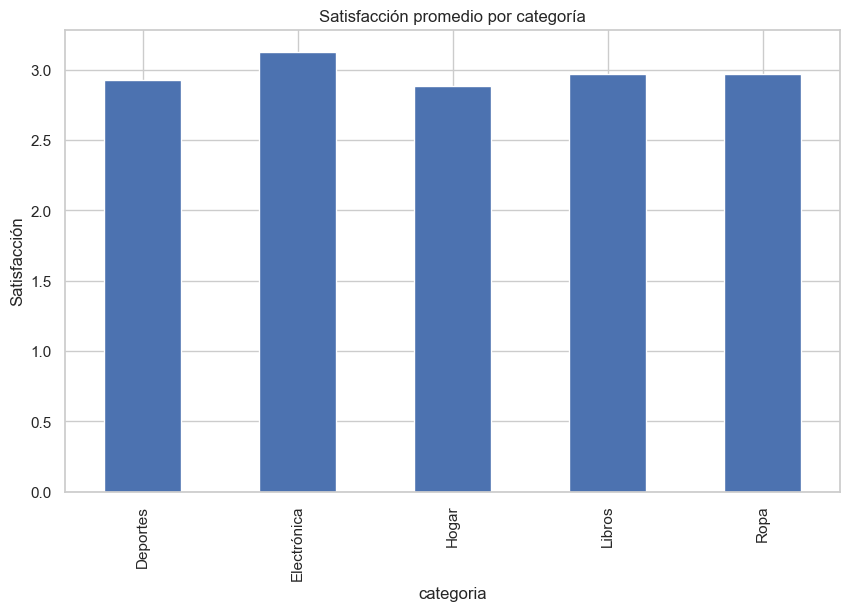

In [35]:
# Gráfico de barras del promedio de satisfacción
df.groupby("categoria")["satisfaccion"].mean().plot(kind="bar")

plt.title("Satisfacción promedio por categoría")
plt.ylabel("Satisfacción")

plt.show()


PARTE 5: Análisis temporal

In [37]:
# Extraer año y mes desde la fecha
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month


Ventas por mes

In [38]:
# Agrupa ventas por mes
ventas_mes = df.groupby("mes")["total_venta"].sum()
ventas_mes


mes
1     15582
2     22293
3     10084
4     30428
5     25027
6     17457
7     14612
8     23037
9     16965
10    20517
11    19401
12    20411
Name: total_venta, dtype: int64

Mes con más y menos ventas

In [39]:
# Identifica meses extremos
ventas_mes.idxmax(), ventas_mes.idxmin()


(np.int32(4), np.int32(3))

PARTE 6: Análisis de satisfacción del cliente

In [41]:
# Promedio general de satisfacción
df["satisfaccion"].mean()


np.float64(2.98)

In [42]:
# Promedio de satisfacción por categoría
df.groupby("categoria")["satisfaccion"].mean()


categoria
Deportes       2.930233
Electrónica    3.128440
Hogar          2.881188
Libros         2.970297
Ropa           2.970874
Name: satisfaccion, dtype: float64

In [43]:
# Promedio de satisfacción por región
df.groupby("region")["satisfaccion"].mean()


region
Centro    3.000000
Este      3.000000
Norte     2.938776
Oeste     3.083333
Sur       2.853933
Name: satisfaccion, dtype: float64

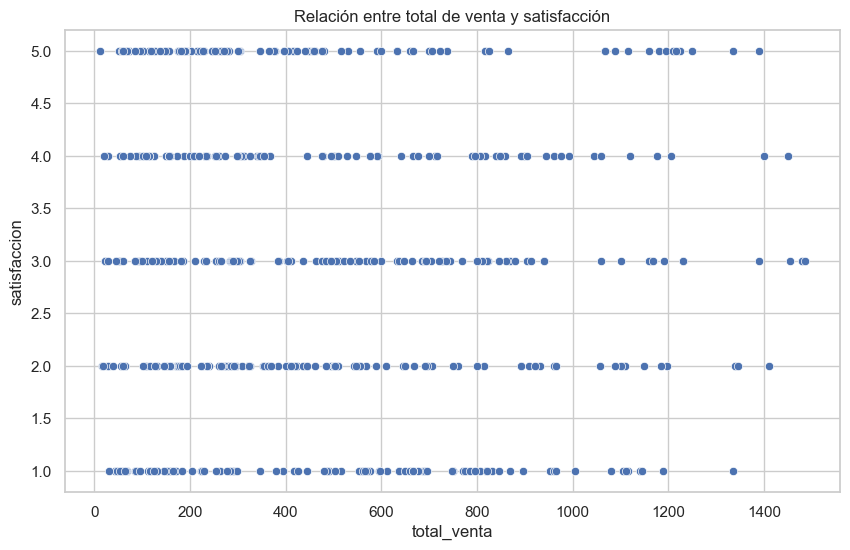

In [44]:
#Relación ventas vs satisfacción
# Scatter plot para ver relación entre ventas y satisfacción
sns.scatterplot(data=df, x="total_venta", y="satisfaccion")

plt.title("Relación entre total de venta y satisfacción")
plt.show()
